## GRIP Task 2

### From the given 'iris' datset, present the optimum number of clusters and represent it visually

#### Author - Shivani K
#### Batch - August 2024

### Importing the necessary libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.cluster import KMeans

### Loading the dataset

In [2]:
df = pd.read_csv('Iris.csv', index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

#### Basic EDA

In [4]:
df.shape

(150, 5)

In [5]:
df.size

750

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


The dataframe has 4 numerical columns and 1 categorical column.

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Checking for duplicate rows and dropping them

In [8]:
df.duplicated().sum()

3

In [9]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

0

In [10]:
df.shape

(147, 5)

#### Checking for presence of null values

In [11]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Univariate Analysis

In [12]:
num = df.select_dtypes(include=np.number).columns.to_list()

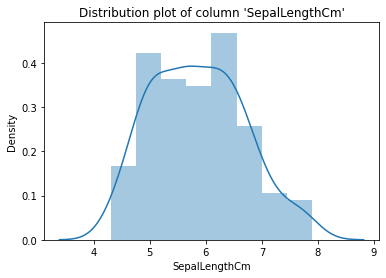

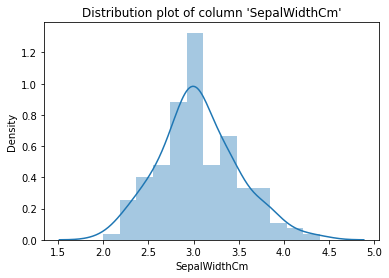

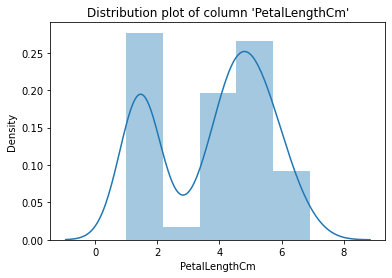

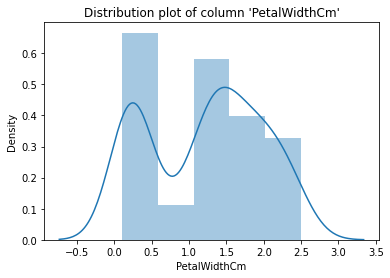

In [32]:
for i in num:
    sns.distplot(df[i])
    plt.title(f"Distribution plot of column '{i}'")
    plt.show()

In [14]:
for i in num:
    print(f"The skew value of column '{i}' is {df[i].skew()}")

The skew value of column 'SepalLengthCm' is 0.29255956516307163
The skew value of column 'SepalWidthCm' is 0.3243506195620299
The skew value of column 'PetalLengthCm' is -0.2937634574565383
The skew value of column 'PetalWidthCm' is -0.11347861374619836


 'SepalLengthCm', 'SepalWidthCm' columns are very slightly positively skewed, while 'PetalLengthCm', 'PetalWidthCm' columns are very slightly negatively skewed.

In [15]:
for i in num:
    print(f"The kurtosis value of column '{i}' is {df[i].kurt()}")

The kurtosis value of column 'SepalLengthCm' is -0.5569564812003911
The kurtosis value of column 'SepalWidthCm' is 0.24683840744328434
The kurtosis value of column 'PetalLengthCm' is -1.3744621135069286
The kurtosis value of column 'PetalWidthCm' is -1.3177600111364542


All the columns are platykurtic in nature.

#### Multivariate Analysis

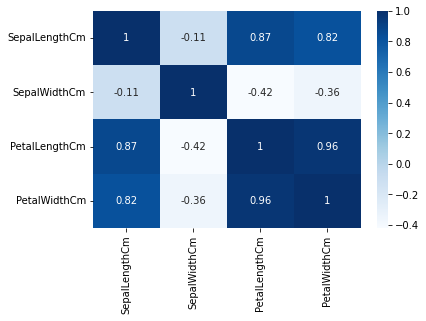

In [16]:
sns.heatmap(df[num].corr(), annot=True, cmap='Blues')
plt.show()

There is a very strong positive correlation(0.96) between columns 'PetalLengthCm' and 'PetalWidthCm'.

In [20]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Model Building

In [21]:
df_new = df.drop(columns='Species')

#### Finding optimal 'k' value

In [22]:
err = {}

for k in range(1,8):
    km = KMeans(n_clusters=k, random_state=10)
    km.fit(df_new) 
    err[k]=km.inertia_
  
err

{1: 663.8952380952381,
 2: 151.77145833333333,
 3: 77.92126282051282,
 4: 56.85119927536232,
 5: 46.09236025641025,
 6: 41.748994444444435,
 7: 34.65658536791061}

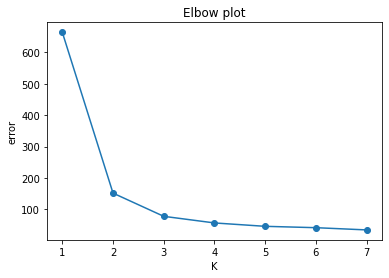

In [23]:
plt.plot(err.keys(),err.values(),marker='o')
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('error')
plt.show()

#### Training the model

In [24]:
km = KMeans(n_clusters=3, random_state=10)
km.fit(df_new)

KMeans(n_clusters=3, random_state=10)

In [25]:
df_new['km_labels']=km.labels_

#### K-Means Clusters vs. Original Species Distribution

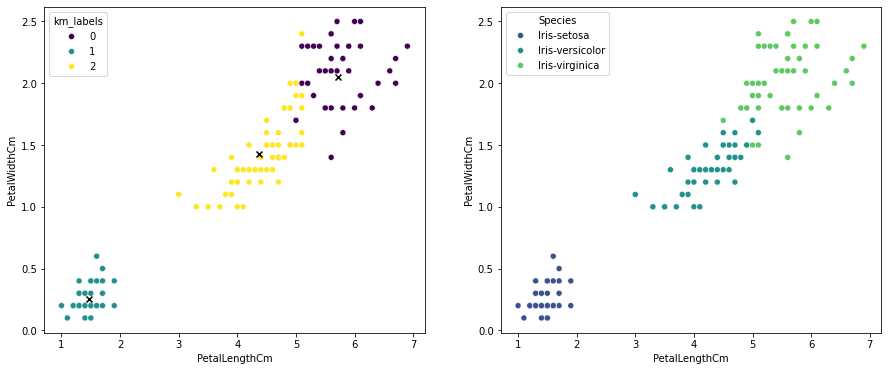

In [26]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x=df_new['PetalLengthCm'],y=df_new['PetalWidthCm'],hue=df_new['km_labels'], palette='viridis')
plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3], marker='x', color='black')

plt.subplot(1,2,2)
sns.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],hue=df['Species'], palette='viridis')
plt.show()

Based on visual inspection of the above 2 plots, it appears that Cluster 0, Cluster 1, and Cluster 2 might correspond to Iris-virginica, Iris-setosa, and Iris-versicolor respectively.